In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

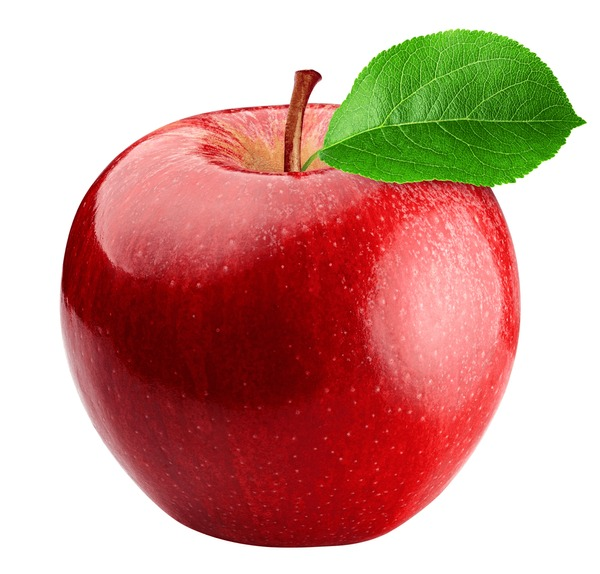

In [2]:
#to write binarisation code (slide 19) for the next image
url = 'https://www.shutterstock.com/image-photo/red-apple-isolated-on-white-600nw-1727544364.jpg'
image = io.imread(url)
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_5)


In [3]:
bw_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

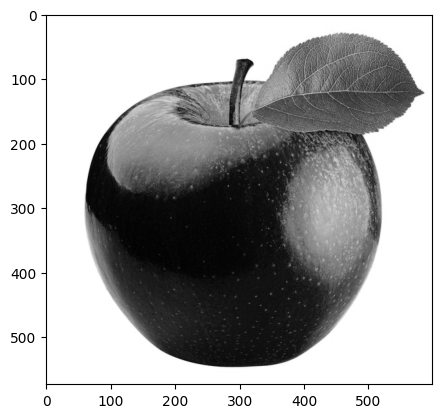

In [4]:
plt.imshow(bw_image, cmap = "gray")

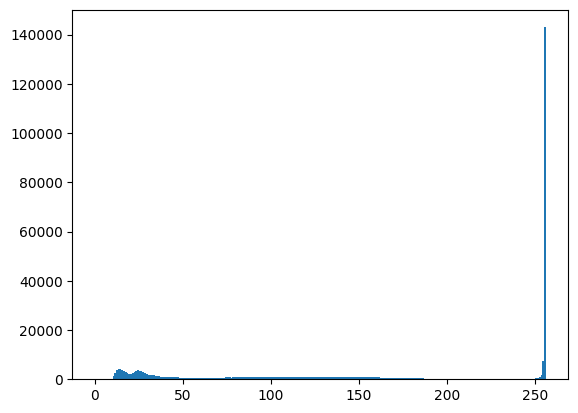

In [5]:
plt.hist(bw_image.ravel(), 256, [0, 256])
plt.show()

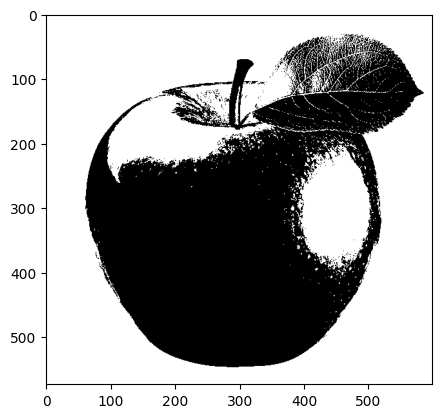

In [6]:
t1 = 255/2
image_b = (bw_image>t1) *255
plt.imshow(image_b,cmap ="gray")

In [7]:
bw_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
t2 = np.mean(bw_image)
t2

158.19827235772357

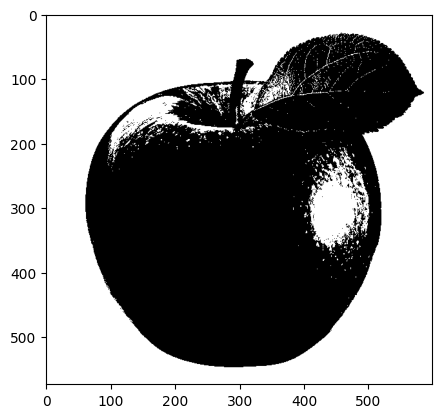

In [9]:
image_b = (bw_image>t2) *255
plt.imshow(image_b,cmap ="gray")

Task 1
You need to implement the code with binarisation to find appropriate threshold do make image binary
1. Randomly select the initial value of the threshold then
2. Segment the image by the threshold To: regions
G1 and G2 of pixels with values > Then and To
3. Calculate the average values of u1 and u2 for the regions
G1 and G2
4. T1 = 0,5 (u1 + u2)
5. Repeat until / Ti -Ti+1/< Tth

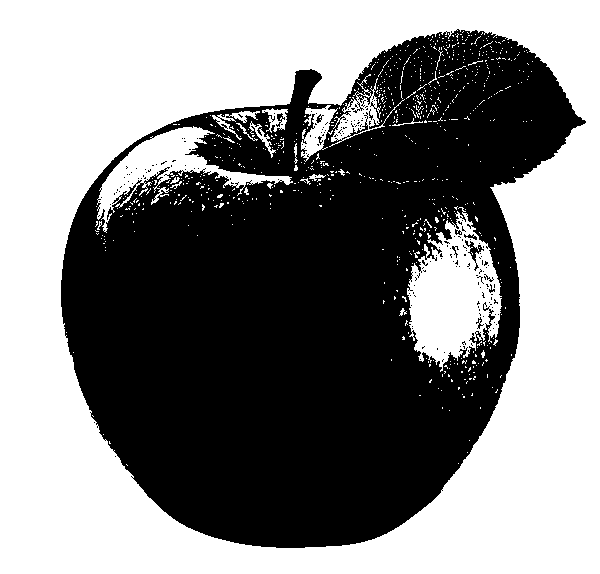

In [12]:
def findOptimalThreshold(img, eps):
  T0 = np.random.randint(0, 256)
  while 1:
    G1 = img[img > T0]
    G2 = img[img <= T0]

    u1 = np.mean(G1) if G1.size > 0 else 0
    u2 = np.mean(G2) if G2.size > 0 else 0

    T1 = 0.5 * (u1 + u2)

    if abs(T0 - T1) < eps:
      break

    T0 = T1

  return int(T1)

eps = 1

optimalT = findOptimalThreshold(bw_image, eps)
binaryImage = (bw_image > optimalT).astype(np.uint8) * 255

cv2_imshow(binaryImage)

